<a target="_blank" href="https://colab.research.google.com/github/YDayoub/MachineLearning_notebooks/blob/main/Ch3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
from sklearn import datasets
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
iris = datasets.load_iris()
print("iris object has the following information:\n{}".format("\n".join(iris.keys())))

iris object has the following information:
data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [ ]:
features_idx = (2, 3)
x, y = iris.data[:, features_idx], iris.target
x[:, 0] = x[:, 0] * 10000
class_names = iris.target_names
features_names = iris.feature_names
features_names[features_idx[0]] = features_names[features_idx[0]].replace("cm", "um")  
print(f"feature_names: {features_names}\nclass_names {class_names.tolist()}")

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (um)', 'petal width (cm)']
class_names ['setosa', 'versicolor', 'virginica']


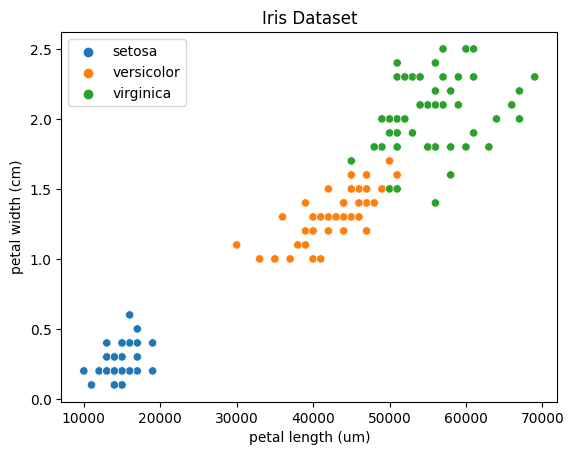

In [ ]:
sns.scatterplot(x=x[:, 0], y=x[:, 1], 
               hue=[class_names[target] for target in y])
plt.title("Iris Dataset");
plt.xlabel(features_names[features_idx[0]])
plt.ylabel(features_names[features_idx[1]])
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
def split_data(x, y, random_state=1, test_size=0.3):    
  x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                      test_size=test_size,
                                                      random_state=random_state,
                                                      stratify=y)
  return x_train, x_test, y_train, y_test



In [ ]:
x_train, x_test, y_train, y_test = split_data(x, y, random_state=1)
print(f"original data: {np.bincount(y)}")
print(f"train data: {np.bincount(y_train)}")
print(f"test data: {np.bincount(y_test)}")

original data: [50 50 50]
train data: [35 35 35]
test data: [15 15 15]


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score

def scale_data(x_train, x_test, scalername:str):
  sc = {"None":None, "standarization":StandardScaler(), "normalization":MinMaxScaler(), "robust scaler":RobustScaler()}
  sc = sc[scalername]
  if sc is None:
    return sc, x_train, x_test
  else:
    x_train_sc = sc.fit_transform(x_train)
    x_test_sc = sc.transform(x_test)
  return sc, x_train_sc, x_test_sc

In [ ]:
from matplotlib.colors import ListedColormap
colors = ['red', 'green', 'blue', 'cyan']
def plot_region(clf, 
                x, 
                y, 
                nb_points=1000, 
                xlabel=features_names[features_idx[0]],
                title=None):
    x1min, x1max = x[:, 0].min(), x[:, 0].max()
    x2min, x2max = x[:, 1].min(), x[:, 1].max()
    offset1, offset2 = 0.1*(x1max-x1min), 0.1*(x2max-x2min)
    res1 = (x1max-x1min + 2*offset1) / nb_points
    res2 = (x2max-x2min + 2*offset2) / nb_points
    cmap = ListedColormap(colors[:len(np.unique(y))])
    xx1, xx2 = np.meshgrid(np.arange(x1min-offset1, x1max+offset1, res1),
                          np.arange(x2min-offset2, x2max+offset2, res2))
    labels = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    labels = labels.reshape(xx1.shape)
    plt.contourf(xx1, xx2, labels, cmap=cmap, alpha=0.3)
    classes = np.unique(y)
    for idx, cls in enumerate(classes):
        plt.scatter(x[y == cls, 0],
                   x[y == cls, 1],
                   c=colors[idx],
                   edgecolor='black',
                   label=f"cls {cls}")
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.legend()

    if title:
        plt.title(title)
    plt.show()    

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import ipywidgets as widgets


@widgets.interact
def fit_logistic_regression(C=(1, 500, 10),
                            random_seed='1',
                            scaler = ["None", "standarization", "normalization", "robust scaler"],
                            mutli_class=['ovr', 'multinomial']):
    random_seed = int(random_seed)

    x_train, x_test, y_train, y_test = split_data(x, y, random_state=random_seed)
    sc, x_train_sc, x_test_sc = scale_data(x_train, x_test, scaler)

    clf = LogisticRegression(C=C,
                             multi_class=mutli_class,
                             solver='lbfgs',
                             )
    clf.fit(x_train_sc, y_train)
    preds = clf.predict(x_test_sc)
    score = accuracy_score(y_test, preds)
    if sc is not None:
      x_sc = sc.transform(x)
    else:
      x_sc = x

    plot_region(clf, x_sc, y, title=f"Score {score*100:.0f}% using C {C}, max coeff {np.max(clf.coef_):.2f}, seed {random_seed}, scaler {scaler}")

# try seed 1 and 1000

interactive(children=(IntSlider(value=241, description='C', max=500, min=1, step=10), Text(value='1', descript…